In [766]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

In [767]:
df = pd.read_csv('Mobile Price Prediction Datatset.csv')

In [768]:
df.head(30)

,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999
5,5,"Apple iPhone 11 Pro (Space Grey, 512 )",4.7,8.0,128.0,5.80,35,12.0,5000,140300
6,6,"Samsung Galaxy A70s (Prism Crush Red, 128 )",4.4,8.0,128.0,6.70,64,5.0,4700,29999
7,7,"Samsung Galaxy S10 Lite (Prism Blue, 512 )",4.5,8.0,128.0,6.70,48,12.0,4700,47999
8,8,"OPPO A9 (Marble Green, 128 )",4.4,4.0,128.0,6.53,48,2.0,4020,16490
9,9,"POCO F1 (Graphite Black, 256 )",4.5,8.0,256.0,6.18,35,5.0,3800,22999


In [769]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     836 non-null    int64  
 1   Brand me       836 non-null    object 
 2   Ratings        805 non-null    float64
 3   RAM            829 non-null    float64
 4   ROM            832 non-null    float64
 5   Mobile_Size    834 non-null    float64
 6   Primary_Cam    836 non-null    int64  
 7   Selfi_Cam      567 non-null    float64
 8   Battery_Power  836 non-null    int64  
 9   Price          836 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 65.4+ KB


In [770]:
df.describe()

,Unnamed: 0,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,836.000000,805.000000,829.000000,832.000000,834.000000,836.000000,567.000000,836.000000,836.00000
mean,417.500000,4.103106,6.066345,64.373077,5.597282,47.983254,9.784832,3274.688995,18220.34689
std,241.476707,0.365356,2.530336,53.447825,3.898664,11.170093,6.503838,927.518852,52805.55022
min,0.000000,2.800000,0.000000,0.000000,2.000000,5.000000,0.000000,1020.000000,479.00000
25%,208.750000,3.800000,6.000000,32.000000,4.500000,48.000000,5.000000,3000.000000,984.75000
50%,417.500000,4.100000,6.000000,40.000000,4.770000,48.000000,8.000000,3000.000000,1697.00000
75%,626.250000,4.400000,6.000000,64.000000,6.300000,48.000000,13.000000,3800.000000,18999.00000
max,835.000000,4.800000,34.000000,256.000000,44.000000,64.000000,61.000000,6000.000000,573000.00000


In [771]:
df["Brand me"].duplicated().sum()

409

In [772]:
df.drop_duplicates('Brand me',inplace=True)
df['Brand me'].duplicated().sum()

0

In [773]:
df.drop(["Unnamed: 0","Brand me"],axis=1,inplace=True)

In [774]:
df.head(30)

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999
5,4.7,8.0,128.0,5.80,35,12.0,5000,140300
6,4.4,8.0,128.0,6.70,64,5.0,4700,29999
7,4.5,8.0,128.0,6.70,48,12.0,4700,47999
8,4.4,4.0,128.0,6.53,48,2.0,4020,16490
9,4.5,8.0,256.0,6.18,35,5.0,3800,22999


In [775]:
df.duplicated().sum()

37

In [776]:
df.isnull().sum()

Ratings           13
RAM                3
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        121
Battery_Power      0
Price              0
dtype: int64

In [777]:
df2 = df.dropna()
df2.duplicated().sum()

33

In [778]:
df2.drop_duplicates(inplace=True)

In [779]:
df2.duplicated().sum()

0

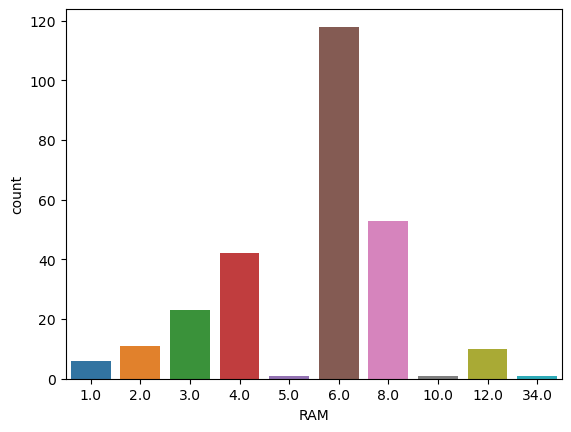

In [780]:
sns.countplot(x='RAM',data=df2)
plt.show()

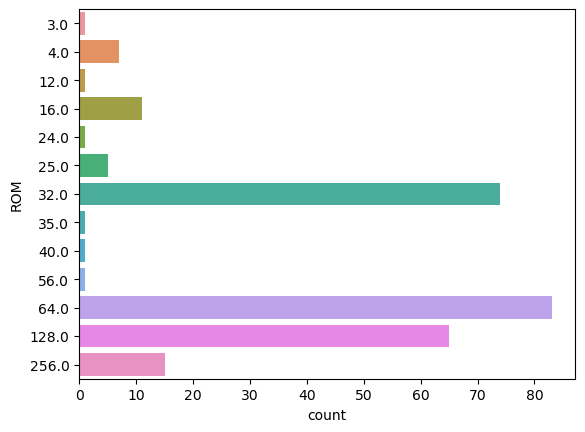

In [781]:
sns.countplot(y='ROM',data=df2,)
plt.show()

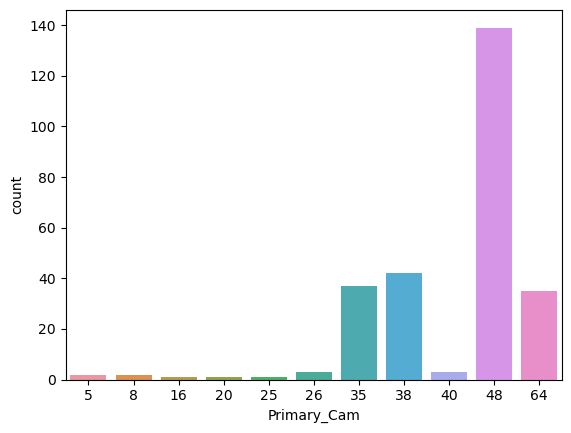

In [782]:
sns.countplot(x='Primary_Cam',data=df2)
plt.show()

In [783]:
df2['Selfi_Cam'].value_counts()

Selfi_Cam
8.0     58
5.0     51
2.0     39
12.0    37
13.0    23
20.0    13
1.0      9
7.0      5
15.0     4
16.0     4
14.0     3
11.0     3
23.0     2
18.0     2
10.0     2
21.0     2
32.0     2
0.0      2
22.0     2
17.0     1
6.0      1
4.0      1
Name: count, dtype: int64

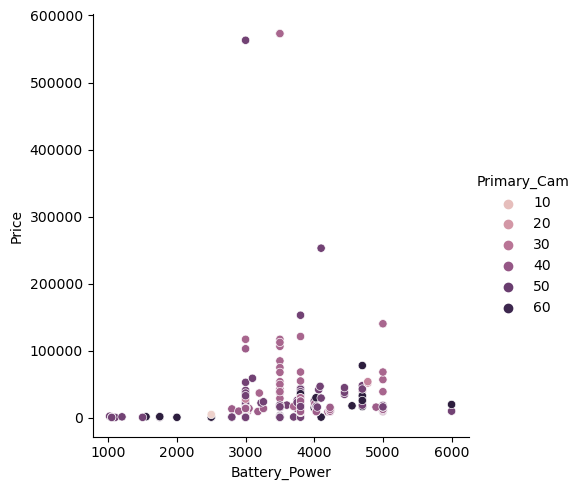

In [784]:
sns.relplot(x='Battery_Power', y='Price',hue='Primary_Cam',data=df2)
plt.show()

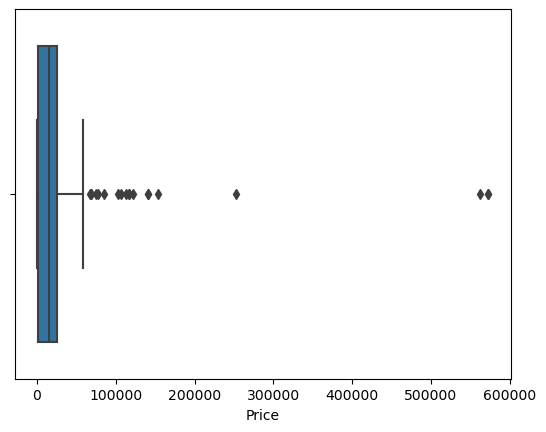

In [785]:
sns.boxplot(x=df2['Price'])
plt.show()

In [786]:
df2 = df2[df2['Price'] <= 200000]

In [787]:
df2

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999
...,...,...,...,...,...,...,...,...
733,4.6,6.0,128.0,6.41,48,5.0,3000,32999
741,4.2,6.0,128.0,6.70,64,5.0,4700,25900
765,4.5,8.0,64.0,4.70,35,7.0,3500,38999
782,3.5,8.0,25.0,4.50,48,22.0,3500,697


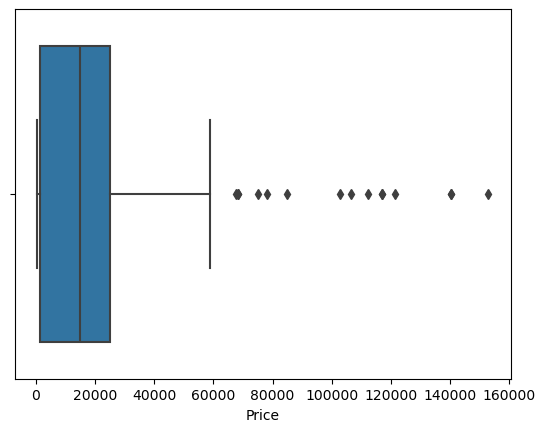

In [788]:
sns.boxplot(x=df2['Price'])
plt.show()

In [789]:
df2 = df2[df2['Price'] <= 70000]
df2

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999
...,...,...,...,...,...,...,...,...
733,4.6,6.0,128.0,6.41,48,5.0,3000,32999
741,4.2,6.0,128.0,6.70,64,5.0,4700,25900
765,4.5,8.0,64.0,4.70,35,7.0,3500,38999
782,3.5,8.0,25.0,4.50,48,22.0,3500,697


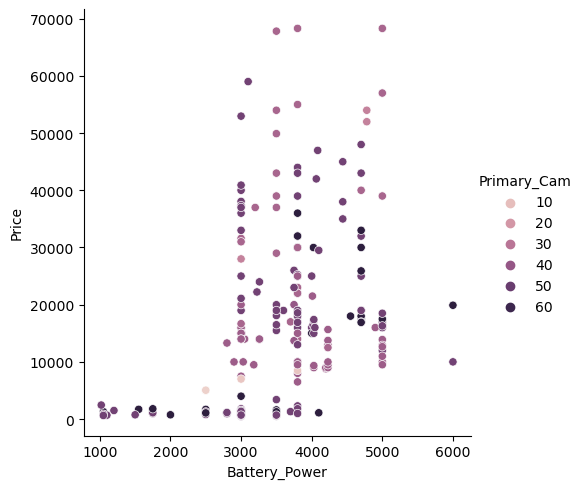

In [790]:
sns.relplot(x='Battery_Power', y='Price',hue='Primary_Cam',data=df2)
plt.show()

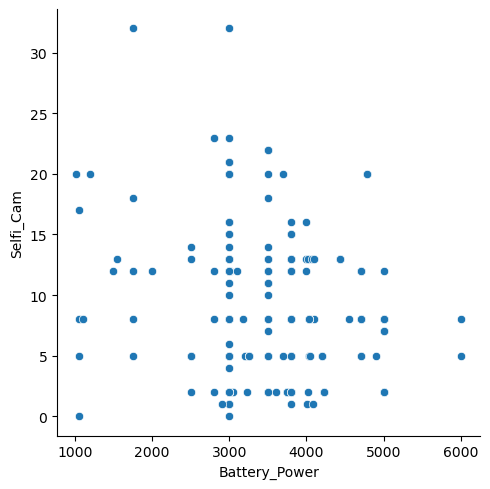

In [791]:
sns.relplot(x='Battery_Power', y='Selfi_Cam',data=df2)
plt.show()

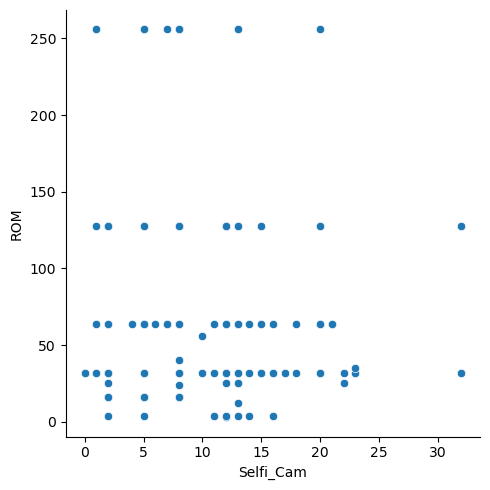

In [792]:
sns.relplot(x='Selfi_Cam', y='ROM',data=df2)
plt.show()

In [793]:
df2

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999
...,...,...,...,...,...,...,...,...
733,4.6,6.0,128.0,6.41,48,5.0,3000,32999
741,4.2,6.0,128.0,6.70,64,5.0,4700,25900
765,4.5,8.0,64.0,4.70,35,7.0,3500,38999
782,3.5,8.0,25.0,4.50,48,22.0,3500,697


In [794]:
df3 = pd.get_dummies(df2,drop_first='if_binary').astype(int)
df3.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4,4,128,6,48,13,4000,24999
1,3,6,64,4,48,12,4000,15999
2,4,4,4,4,64,16,4000,15000
3,4,6,64,6,48,15,3800,18999
4,4,6,128,6,35,15,3800,18999


In [795]:
x = df3.drop(columns='Price')
y = df3[['Price']]

In [796]:
y

,Price
0,24999
1,15999
2,15000
3,18999
4,18999
...,...
733,32999
741,25900
765,38999
782,697


In [797]:
from sklearn.model_selection import train_test_split

In [798]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)  

In [799]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [800]:
rf.fit(x_train,y_train)
print('Training:',rf.score(x_train,y_train)*100,' Testing:',rf.score(x_test,y_test)*100)

Training: 96.08299027411728  Testing: 84.78801664509979


In [801]:
pred_price = rf.predict(x_test)

In [802]:
y_test['prediction'] = pred_price

In [803]:
y_test.head()

,Price,prediction
339,38999,32858.520000
397,1799,1182.710000
471,13999,19031.330000
682,24999,21883.357500
19,12990,11123.719667


In [804]:
from sklearn.metrics import mean_squared_error, r2_score

In [805]:
mse = mean_squared_error(y_test['Price'],pred_price)
r2 = r2_score(y_test['Price'], pred_price)

In [806]:
print("R^2:", r2)
print("MSE:", mse)

R^2: 0.8478801664509978
MSE: 44083724.64027956


In [811]:
joblib.dump(rf,'Random_Forest.lb')

['Random_Forest.lb']

In [812]:
rf

RandomForestRegressor()

In [816]:
x_test.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power
339,4,8,64,4,35,7,5000
397,4,6,32,4,64,12,1750
471,3,4,64,5,48,5,3000
682,3,4,64,5,38,13,3800
19,4,2,32,6,38,2,4230


In [815]:
y_test.head()

,Price,prediction
339,38999,32858.520000
397,1799,1182.710000
471,13999,19031.330000
682,24999,21883.357500
19,12990,11123.719667
